In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import nltk
import spacy
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

In [2]:
# Loading dataset for postitve and negative review

pos_review = pd.read_csv('pos.txt',encoding='latin-1',header=None,sep='\n')
pos_review['sentiment']=1
pos_review.rename(columns={0:'review'},inplace=True)
neg_review = pd.read_csv('negative.txt',encoding='latin-1',header=None,sep='\n')
neg_review['sentiment']=0
neg_review.rename(columns={0:'review'},inplace=True)

In [3]:
pos_review

,review,sentiment
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
5326,both exuberantly romantic and serenely melanch...,1
5327,mazel tov to a film about a family's joyous li...,1
5328,standing in the shadows of motown is the best ...,1
5329,it's nice to see piscopo again after all these...,1


In [4]:
neg_review

,review,sentiment
0,"simplistic , silly and tedious.",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0
...,...,...
5326,a terrible movie that some people will neverth...,0
5327,there are many definitions of 'time waster' bu...,0
5328,"as it stands , crocodile hunter has the hurrie...",0
5329,the thing looks like a made-for-home-video qui...,0


In [5]:
all_data = pd.concat([pos_review,neg_review],axis=0,ignore_index=True)
all_data.head()

,review,sentiment
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [6]:
all_data.tail()

,review,sentiment
10657,a terrible movie that some people will neverth...,0
10658,there are many definitions of 'time waster' bu...,0
10659,"as it stands , crocodile hunter has the hurrie...",0
10660,the thing looks like a made-for-home-video qui...,0
10661,"enigma is well-made , but it's just too dry an...",0


In [7]:
df = all_data[['review']]
df.head()

,review
0,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha..."


# Text Preprocessing

### Converting text to lower case

In [8]:
df["text_lower"] = df["review"].str.lower()
df.head()

,review,text_lower
0,the rock is destined to be the 21st century's ...,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the...","the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha...","emerges as something rare , an issue movie tha..."


### Removing Stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Adit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# all stopwords in nltk library
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [11]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_lower"].apply(lambda text: remove_stopwords(text))
df.head()

,review,text_lower,text_wo_stop
0,the rock is destined to be the 21st century's ...,the rock is destined to be the 21st century's ...,"rock destined 21st century's new "" conan "" he'..."
1,"the gorgeously elaborate continuation of "" the...","the gorgeously elaborate continuation of "" the...","gorgeously elaborate continuation "" lord rings..."
2,effective but too-tepid biopic,effective but too-tepid biopic,effective too-tepid biopic
3,if you sometimes like to go to the movies to h...,if you sometimes like to go to the movies to h...,"sometimes like go movies fun , wasabi good pla..."
4,"emerges as something rare , an issue movie tha...","emerges as something rare , an issue movie tha...","emerges something rare , issue movie that's ho..."


### Remove Punctuations

In [12]:
PUNCT_TO_REMOVE = string.punctuation
print (PUNCT_TO_REMOVE)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text_wo_stop"].apply(lambda text: remove_punctuation(text))
df.head()

,review,text_lower,text_wo_stop,text_wo_punct
0,the rock is destined to be the 21st century's ...,the rock is destined to be the 21st century's ...,"rock destined 21st century's new "" conan "" he'...",rock destined 21st centurys new conan hes go...
1,"the gorgeously elaborate continuation of "" the...","the gorgeously elaborate continuation of "" the...","gorgeously elaborate continuation "" lord rings...",gorgeously elaborate continuation lord rings ...
2,effective but too-tepid biopic,effective but too-tepid biopic,effective too-tepid biopic,effective tootepid biopic
3,if you sometimes like to go to the movies to h...,if you sometimes like to go to the movies to h...,"sometimes like go movies fun , wasabi good pla...",sometimes like go movies fun wasabi good plac...
4,"emerges as something rare , an issue movie tha...","emerges as something rare , an issue movie tha...","emerges something rare , issue movie that's ho...",emerges something rare issue movie thats hone...


### Removing rare words

In [14]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_punct"].values:
    for word in text.split():
        cnt[word] += 1
# Printing 10 most common words        
cnt.most_common(10)

# Some of these words such as like,good are essential for sentiment analysis hence not removing them

[('film', 1453),
 ('movie', 1270),
 ('one', 727),
 ('like', 721),
 ('story', 477),
 ('much', 386),
 ('even', 382),
 ('good', 377),
 ('comedy', 359),
 ('time', 341)]

In [15]:
# Printing 20 most rare words
n_rare_words = 20
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
print(RAREWORDS)

{'pamelas', 'chore', 'waster', 'rodan', 'discount', 'principle', 'definitions', 'madeforhomevideo', 'stevenons', 'dozing', 'uncertainty', 'startled', 'juliet', 'commenting', 'agile', 'roller', 'hurried', 'shouting', 'coaster', '1959'}


In [16]:
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_punct"].apply(lambda text: remove_rarewords(text))
df.head()

,review,text_lower,text_wo_stop,text_wo_punct,text_wo_stopfreqrare
0,the rock is destined to be the 21st century's ...,the rock is destined to be the 21st century's ...,"rock destined 21st century's new "" conan "" he'...",rock destined 21st centurys new conan hes go...,rock destined 21st centurys new conan hes goin...
1,"the gorgeously elaborate continuation of "" the...","the gorgeously elaborate continuation of "" the...","gorgeously elaborate continuation "" lord rings...",gorgeously elaborate continuation lord rings ...,gorgeously elaborate continuation lord rings t...
2,effective but too-tepid biopic,effective but too-tepid biopic,effective too-tepid biopic,effective tootepid biopic,effective tootepid biopic
3,if you sometimes like to go to the movies to h...,if you sometimes like to go to the movies to h...,"sometimes like go movies fun , wasabi good pla...",sometimes like go movies fun wasabi good plac...,sometimes like go movies fun wasabi good place...
4,"emerges as something rare , an issue movie tha...","emerges as something rare , an issue movie tha...","emerges something rare , issue movie that's ho...",emerges something rare issue movie thats hone...,emerges something rare issue movie thats hones...


### Removing digits


In [17]:
def remove_digits(text):
    """function to remove digits"""
    return " ".join([word for word in str(text).split() if not word.isdigit()])


df["text_wo_digits"] = df["text_wo_stopfreqrare"].apply(lambda text: remove_digits(text))
df.head()

,review,text_lower,text_wo_stop,text_wo_punct,text_wo_stopfreqrare,text_wo_digits
0,the rock is destined to be the 21st century's ...,the rock is destined to be the 21st century's ...,"rock destined 21st century's new "" conan "" he'...",rock destined 21st centurys new conan hes go...,rock destined 21st centurys new conan hes goin...,rock destined 21st centurys new conan hes goin...
1,"the gorgeously elaborate continuation of "" the...","the gorgeously elaborate continuation of "" the...","gorgeously elaborate continuation "" lord rings...",gorgeously elaborate continuation lord rings ...,gorgeously elaborate continuation lord rings t...,gorgeously elaborate continuation lord rings t...
2,effective but too-tepid biopic,effective but too-tepid biopic,effective too-tepid biopic,effective tootepid biopic,effective tootepid biopic,effective tootepid biopic
3,if you sometimes like to go to the movies to h...,if you sometimes like to go to the movies to h...,"sometimes like go movies fun , wasabi good pla...",sometimes like go movies fun wasabi good plac...,sometimes like go movies fun wasabi good place...,sometimes like go movies fun wasabi good place...
4,"emerges as something rare , an issue movie tha...","emerges as something rare , an issue movie tha...","emerges something rare , issue movie that's ho...",emerges something rare issue movie thats hone...,emerges something rare issue movie thats hones...,emerges something rare issue movie thats hones...


In [18]:
import re
lst=[]
def remove_special_digits(text):
    pattern = r'[0-9]+[a-zA-Z]+'
    for word in str(text).split(): 
        new_string = re.sub(pattern, '', word)
        lst.append(new_string)
    return " ".join(lst)
df2 = df['text_wo_digits'].apply(lambda text: remove_special_digits(text))
df2

0        rock destined  centurys new conan hes going ma...
1        rock destined  centurys new conan hes going ma...
2        rock destined  centurys new conan hes going ma...
3        rock destined  centurys new conan hes going ma...
4        rock destined  centurys new conan hes going ma...
                               ...                        
10657    rock destined  centurys new conan hes going ma...
10658    rock destined  centurys new conan hes going ma...
10659    rock destined  centurys new conan hes going ma...
10660    rock destined  centurys new conan hes going ma...
10661    rock destined  centurys new conan hes going ma...
Name: text_wo_digits, Length: 10662, dtype: object

In [19]:
# There are some numbers liks 1990s or 3rd , removing those as well
pattern = r'[0-9]+[a-zA-Z]+'
def remove_special_digits(text):
    return " ".join([word for word in str(text).split() if len(re.sub(pattern, '', word))>0])
    
df['text_wo_special_digits'] = df['text_wo_digits'].apply(lambda text: remove_special_digits(text))
df.head()

,review,text_lower,text_wo_stop,text_wo_punct,text_wo_stopfreqrare,text_wo_digits,text_wo_special_digits
0,the rock is destined to be the 21st century's ...,the rock is destined to be the 21st century's ...,"rock destined 21st century's new "" conan "" he'...",rock destined 21st centurys new conan hes go...,rock destined 21st centurys new conan hes goin...,rock destined 21st centurys new conan hes goin...,rock destined centurys new conan hes going mak...
1,"the gorgeously elaborate continuation of "" the...","the gorgeously elaborate continuation of "" the...","gorgeously elaborate continuation "" lord rings...",gorgeously elaborate continuation lord rings ...,gorgeously elaborate continuation lord rings t...,gorgeously elaborate continuation lord rings t...,gorgeously elaborate continuation lord rings t...
2,effective but too-tepid biopic,effective but too-tepid biopic,effective too-tepid biopic,effective tootepid biopic,effective tootepid biopic,effective tootepid biopic,effective tootepid biopic
3,if you sometimes like to go to the movies to h...,if you sometimes like to go to the movies to h...,"sometimes like go movies fun , wasabi good pla...",sometimes like go movies fun wasabi good plac...,sometimes like go movies fun wasabi good place...,sometimes like go movies fun wasabi good place...,sometimes like go movies fun wasabi good place...
4,"emerges as something rare , an issue movie tha...","emerges as something rare , an issue movie tha...","emerges something rare , issue movie that's ho...",emerges something rare issue movie thats hone...,emerges something rare issue movie thats hones...,emerges something rare issue movie thats hones...,emerges something rare issue movie thats hones...


### Lemmatization

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Adit/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_special_digits"].apply(lambda text: lemmatize_words(text))
df.head()

,review,text_lower,text_wo_stop,text_wo_punct,text_wo_stopfreqrare,text_wo_digits,text_wo_special_digits,text_lemmatized
0,the rock is destined to be the 21st century's ...,the rock is destined to be the 21st century's ...,"rock destined 21st century's new "" conan "" he'...",rock destined 21st centurys new conan hes go...,rock destined 21st centurys new conan hes goin...,rock destined 21st centurys new conan hes goin...,rock destined centurys new conan hes going mak...,rock destine centurys new conan he go make spl...
1,"the gorgeously elaborate continuation of "" the...","the gorgeously elaborate continuation of "" the...","gorgeously elaborate continuation "" lord rings...",gorgeously elaborate continuation lord rings ...,gorgeously elaborate continuation lord rings t...,gorgeously elaborate continuation lord rings t...,gorgeously elaborate continuation lord rings t...,gorgeously elaborate continuation lord ring tr...
2,effective but too-tepid biopic,effective but too-tepid biopic,effective too-tepid biopic,effective tootepid biopic,effective tootepid biopic,effective tootepid biopic,effective tootepid biopic,effective tootepid biopic
3,if you sometimes like to go to the movies to h...,if you sometimes like to go to the movies to h...,"sometimes like go movies fun , wasabi good pla...",sometimes like go movies fun wasabi good plac...,sometimes like go movies fun wasabi good place...,sometimes like go movies fun wasabi good place...,sometimes like go movies fun wasabi good place...,sometimes like go movie fun wasabi good place ...
4,"emerges as something rare , an issue movie tha...","emerges as something rare , an issue movie tha...","emerges something rare , issue movie that's ho...",emerges something rare issue movie thats hone...,emerges something rare issue movie thats hones...,emerges something rare issue movie thats hones...,emerges something rare issue movie thats hones...,emerges something rare issue movie thats hones...


In [22]:
X_train,X_test,y_train,y_test = train_test_split(df['text_lemmatized'].values,all_data['sentiment'].values,test_size=0.2,random_state=365)

In [23]:
train_data = pd.DataFrame({'review':X_train , 'sentiment':y_train})
test_data = pd.DataFrame({'review':X_test , 'sentiment':y_test})

In [24]:
train_data

,review,sentiment
0,movie amateurish minor treat,1
1,unfortunately heartbreak hospital want convey ...,0
2,australia land beyond time enjoyable big movie...,1
3,mr deed sure give lot laugh simple sweet roman...,1
4,sort burly action flick one coincidence pummel...,0
...,...,...
8524,whats next rob schneider dana carvey sarah mic...,0
8525,result something quite fresh delightful,1
8526,despite hoffman best effort wilson remain sile...,0
8527,unusually dryeyed even analytical approach mat...,1


In [25]:
test_data

,review,sentiment
0,whats surprising traditional thriller moderate...,0
1,three excellent principal singer youthful good...,1
2,movie feel like pilot episode new teentargeted...,0
3,cast delivers without sham rawnerved story,1
4,stagey talky long good,0
...,...,...
2128,unsurprisingly way work make woman look like s...,0
2129,friday next kind film could make africanameric...,0
2130,humble little film fuel light comedic work zha...,1
2131,story intelligent high school student deal fir...,1


In [26]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data['review'])
test_vectors = vectorizer.transform(test_data['review'])

In [27]:
vectorizer.get_feature_names()

['70s',
 'aaliyah',
 'aan',
 'abagnales',
 'abandon',
 'abandone',
 'abbass',
 'abbasss',
 'abbott',
 'abbreviate',
 'abc',
 'abderrahmane',
 'abel',
 'aberration',
 'abhorrent',
 'abhors',
 'abide',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aboriginal',
 'abornin',
 'abort',
 'aboul',
 'abound',
 'aboveaverage',
 'abrasive',
 'abridge',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolutamente',
 'absolute',
 'absolutely',
 'absorb',
 'absorbs',
 'abstract',
 'absurd',
 'absurdist',
 'absurdity',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'aby',
 'abysmal',
 'abyss',
 'acaba',
 'acabamos',
 'academic',
 'academy',
 'accelerated',
 'accent',
 'accentuate',
 'accept',
 'acceptable',
 'acceptance',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'accidentprone',
 'acclaim',
 'accommodate',
 'accompanies',
 'accompany',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishment',

In [55]:
from sklearn import svm
from sklearn.metrics import classification_report

svc = svm.SVC()
svc.fit(train_vectors,train_data['sentiment'])

SVC()

In [56]:
pred = svc.predict(test_vectors)


In [68]:
print(classification_report(test_data['sentiment'],pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1072
           1       0.75      0.75      0.75      1061

    accuracy                           0.75      2133
   macro avg       0.75      0.75      0.75      2133
weighted avg       0.75      0.75      0.75      2133



In [58]:
print(f"Positive {report['1']['recall']}")
print(f"Negative {report['0']['recall']}")

# 75% recall with baseline model

Positive 0.7502356267672008
Negative 0.7509328358208955


In [32]:
report

{'0': {'precision': 0.7523364485981309,
  'recall': 0.7509328358208955,
  'f1-score': 0.7516339869281045,
  'support': 1072},
 '1': {'precision': 0.748824082784572,
  'recall': 0.7502356267672008,
  'f1-score': 0.7495291902071564,
  'support': 1061},
 'accuracy': 0.7505860290670417,
 'macro avg': {'precision': 0.7505802656913514,
  'recall': 0.7505842312940482,
  'f1-score': 0.7505815885676304,
  'support': 2133},
 'weighted avg': {'precision': 0.7505893224245791,
  'recall': 0.7505860290670417,
  'f1-score': 0.7505870158446887,
  'support': 2133}}

In [33]:
data = ['Good movie']
vector = vectorizer.transform(data).toarray()
prediction = classifier.predict(vector)

In [34]:
if(prediction[0]==1):
    print('Good review')
else:
    print('Bad review')

Good review


In [35]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB().fit(train_vectors,train_data['sentiment'])

In [36]:
all_predictions = nb_model.predict(test_vectors)
print(all_predictions)

[1 1 0 ... 1 1 1]


In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_data['sentiment'],all_predictions))
print(confusion_matrix(test_data['sentiment'],all_predictions))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1072
           1       0.76      0.78      0.77      1061

    accuracy                           0.77      2133
   macro avg       0.77      0.77      0.77      2133
weighted avg       0.77      0.77      0.77      2133

[[811 261]
 [236 825]]


In [42]:
data = ['Average movie']
vector = vectorizer.transform(data).toarray()
prediction = nb_model.predict(vector)


if(prediction[0]==1):
    print('Good review')
else:
    print('Bad review')

Good review


In [45]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_vectors,train_data['sentiment'])

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred_DT = classifier.predict(test_vectors)
y_pred_DT

array([0, 1, 0, ..., 1, 1, 1])

In [47]:
cm_DT = confusion_matrix(test_data['sentiment'],y_pred_DT)
cm_DT

array([[690, 382],
       [412, 649]])

In [49]:
print(classification_report(test_data['sentiment'],y_pred_DT))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1072
           1       0.63      0.61      0.62      1061

    accuracy                           0.63      2133
   macro avg       0.63      0.63      0.63      2133
weighted avg       0.63      0.63      0.63      2133



In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_rf.fit(train_vectors,train_data['sentiment'])

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [64]:
y_pred_RF = classifier_rf.predict(test_vectors)
cm_RF = confusion_matrix(test_data['sentiment'], y_pred_RF)
cm_RF

array([[794, 278],
       [371, 690]])

In [65]:
print(classification_report(test_data['sentiment'],y_pred_RF))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1072
           1       0.71      0.65      0.68      1061

    accuracy                           0.70      2133
   macro avg       0.70      0.70      0.70      2133
weighted avg       0.70      0.70      0.70      2133



In [71]:
import time

fit_rf = RandomForestClassifier(random_state=42)

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
cv_rf.fit(train_vectors,train_data['sentiment'])
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))



Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  774.50


In [75]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 4, bootstrap=True)

RandomForestClassifier(max_depth=4, n_estimators=15, oob_score=True,
                       random_state=42, warm_start=True)

In [76]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(train_vectors,train_data['sentiment'])

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/Adit/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not h

In [77]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

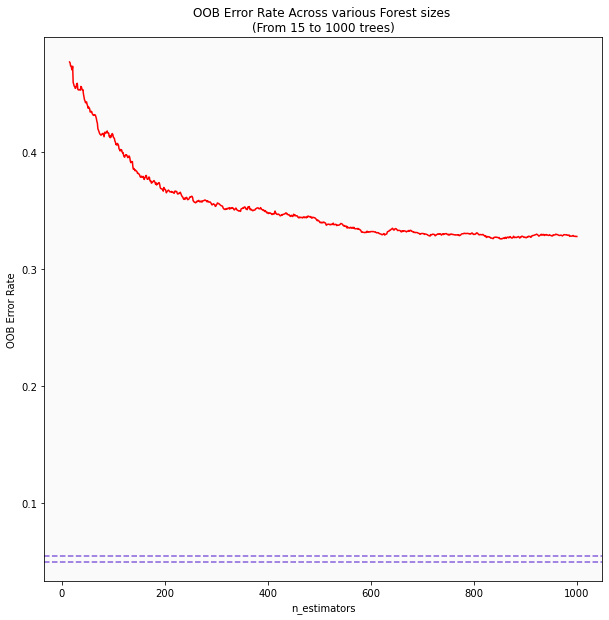

In [80]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [81]:
fit_rf.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

In [82]:
fit_rf.fit(train_vectors,train_data['sentiment'])

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

In [83]:
predictions_rf = fit_rf.predict(test_vectors)

In [87]:
conf_mat=confusion_matrix(test_data['sentiment'], predictions_rf)

<AxesSubplot:>

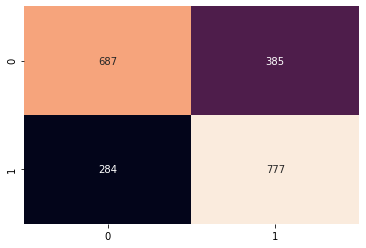

In [89]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)


In [59]:

from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid,verbose = 3)
  
grid.fit(train_vectors,train_data['sentiment'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   7.4s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   7.5s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   9.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   9.9s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   8.3s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   9.1s
[CV 2/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   9.0s
[CV 3/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   9.1s
[CV 4/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   9.5s
[CV 5/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   9.2s
[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   9.1s
[CV 2/5] END .................C=0.1, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [61]:
from sklearn import svm
from sklearn.metrics import classification_report

svc = svm.SVC(C=10,gamma=0.1,kernel='rbf')
svc.fit(train_vectors,train_data['sentiment'])

SVC(C=10, gamma=0.1)

In [62]:
svm_tuned_pred = svc.predict(test_vectors)

In [63]:
print(classification_report(test_data['sentiment'],svm_tuned_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1072
           1       0.74      0.76      0.75      1061

    accuracy                           0.75      2133
   macro avg       0.75      0.75      0.75      2133
weighted avg       0.75      0.75      0.75      2133



In [85]:
confusion_matrix(test_data['sentiment'], svm_tuned_pred)

array([[792, 280],
       [254, 807]])

In [91]:
import joblib

joblib.dump(vectorizer , 'tfidf_vector_model.pkl')
joblib.dump(svc , 'netflix_model.pkl')

['netflix_model.pkl']